In [ ]:
#------------------------------------------------- crop image 사용 -----------------------------------------------------------------#

In [1]:
! conda install matplotlib
! conda install numpy
! conda install tifffile
! conda install PIL

^C
^C
^C
^C


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets  import RectangleSelector
import tifffile as tiff
from PIL import Image
import pims
import os

In [2]:
%matplotlib notebook

In [3]:
datas_path_dir = 'C:/Users/1/Desktop/workspace/datas'
datas_list = os.listdir(datas_path_dir)
print(datas_list)

['cropped_datas', 'finished_datas', 'original_datas', 'results']


In [4]:
os.startfile(datas_path_dir+'/'+datas_list[2])

In [5]:
original_path = datas_path_dir+'/'+datas_list[2]
cropped_path = datas_path_dir+'/'+datas_list[0]
finished_path = datas_path_dir+'/'+datas_list[1]
result_path = datas_path_dir+'/'+datas_list[3]

print(f'original_path:{original_path} cropped_path:{cropped_path} finished_path:{finished_path} result_path:{result_path} ')

original_path:C:/Users/1/Desktop/workspace/datas/original_datas cropped_path:C:/Users/1/Desktop/workspace/datas/cropped_datas finished_path:C:/Users/1/Desktop/workspace/datas/finished_datas result_path:C:/Users/1/Desktop/workspace/datas/results 


In [6]:
original_datas_list = os.listdir(original_path)
print(original_datas_list)

['50fps_capsi_trap_230104_sample1 (2) (1).tif', '50fps_capsi_trap_230104_sample1 (2).tif', '50fps_capsi_trap_230104_sample1 (3) (1).tif', '50fps_capsi_trap_230104_sample1 (4) (1).tif', '50fps_capsi_trap_230104_sample1 (5).tif', '50fps_capsi_trap_230104_sample2 (1) (1).tif', '50fps_capsi_trap_230104_sample2 (2).tif', '50fps_capsi_trap_230104_sample2 (3) (1).tif', '50fps_capsi_trap_230104_sample2 (4).tif', '50fps_capsi_trap_230104_sample2 (5) (1).tif', '50fps_capsi_trap_230104_sample3 (1).tif', '50fps_capsi_trap_230104_sample3 (2).tif', '50fps_capsi_trap_230104_sample3 (3).tif', '50fps_capsi_trap_230104_sample3 (4) (1).tif', '50fps_capsi_trap_230104_sample3 (5) (1).tif', '50fps_capsi_trap_230104_sample3 (5).tif']


In [7]:
original_datas_index = 4
print(original_path+'/'+original_datas_list[original_datas_index])

C:/Users/1/Desktop/workspace/datas/original_datas/50fps_capsi_trap_230104_sample1 (5).tif


In [8]:
x_range = [0,0]
y_range = [0,0]

img = tiff.imread(original_path+'/'+original_datas_list[original_datas_index ])
img_array = np.array(img)

fig, ax = plt.subplots()
imgs = ax.imshow(img_array[:][0], cmap = 'gray')

<IPython.core.display.Javascript object>

In [9]:
def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))

    global x_range
    global y_range

    x_range = [x1,x2]
    y_range = [y1,y2]

rs = RectangleSelector(ax, line_select_callback,
                       useblit=False, button=[1,3],
                       minspanx=5, minspany=5, spancoords='pixels',
                       interactive=True)
plt.show()

#crop_img_array = img_array[:][0][int(y_range[0]):int(y_range[1]),int(x_range[0]):int(x_range[1])]

In [11]:
crop_img_array = img_array[:][0][int(y_range[0]):int(y_range[1]),int(x_range[0]):int(x_range[1])]

fig, ax = plt.subplots(frameon=False)
ax.axis('off')
imgs = ax.imshow(crop_img_array , cmap = 'gray')

plt.show()

<IPython.core.display.Javascript object>

In [12]:
for i in range(len(img_array[:])):
    crop_img_array = img_array[:][i][int(y_range[0]):int(y_range[1]),int(x_range[0]):int(x_range[1])]
    #print(crop_img_array.shape)
    if i == 0:
        nd_array_stack = np.array([crop_img_array])
    else:
        nd_array_stack = np.concatenate((nd_array_stack,[crop_img_array]),axis=0)

print(nd_array_stack.shape)
print(nd_array_stack)


(500, 83, 66)
[[[38776 37981 37924 ... 30613 28368 26235]
  [39027 38416 38681 ... 34060 31266 29669]
  [39611 39775 39455 ... 37805 35143 33695]
  ...
  [41853 44631 41668 ... 37880 37448 36678]
  [41686 45802 45564 ... 38279 36525 35071]
  [40946 46249 48935 ... 38738 37471 35076]]

 [[39033 38017 37850 ... 29651 28111 26124]
  [38471 38337 38461 ... 33319 30936 28931]
  [39318 40332 39233 ... 37098 34740 32881]
  ...
  [43187 45714 43429 ... 38026 37306 35779]
  [42009 46054 46294 ... 37993 37425 34999]
  [40302 44442 46628 ... 38883 37578 35041]]

 [[38811 38017 38291 ... 30353 28223 26162]
  [38434 38380 38277 ... 33801 31265 29116]
  [39355 40037 38826 ... 36987 34887 32400]
  ...
  [42105 43079 42639 ... 37266 36907 36176]
  [41397 42400 42933 ... 37017 36561 34675]
  [41056 41626 40789 ... 38595 38013 35437]]

 ...

 [[39145 39016 39846 ... 30355 28516 26568]
  [37585 37895 38941 ... 33468 31338 29300]
  [37515 38999 39088 ... 37026 34182 31478]
  ...
  [36994 38544 40586 ... 4

In [13]:
converted_data =  nd_array_stack
print(nd_array_stack)
print(type(nd_array_stack))
tiff.imwrite(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index], converted_data, photometric='minisblack')

[[[38776 37981 37924 ... 30613 28368 26235]
  [39027 38416 38681 ... 34060 31266 29669]
  [39611 39775 39455 ... 37805 35143 33695]
  ...
  [41853 44631 41668 ... 37880 37448 36678]
  [41686 45802 45564 ... 38279 36525 35071]
  [40946 46249 48935 ... 38738 37471 35076]]

 [[39033 38017 37850 ... 29651 28111 26124]
  [38471 38337 38461 ... 33319 30936 28931]
  [39318 40332 39233 ... 37098 34740 32881]
  ...
  [43187 45714 43429 ... 38026 37306 35779]
  [42009 46054 46294 ... 37993 37425 34999]
  [40302 44442 46628 ... 38883 37578 35041]]

 [[38811 38017 38291 ... 30353 28223 26162]
  [38434 38380 38277 ... 33801 31265 29116]
  [39355 40037 38826 ... 36987 34887 32400]
  ...
  [42105 43079 42639 ... 37266 36907 36176]
  [41397 42400 42933 ... 37017 36561 34675]
  [41056 41626 40789 ... 38595 38013 35437]]

 ...

 [[39145 39016 39846 ... 30355 28516 26568]
  [37585 37895 38941 ... 33468 31338 29300]
  [37515 38999 39088 ... 37026 34182 31478]
  ...
  [36994 38544 40586 ... 43419 40978 385

In [14]:
print(nd_array_stack)
print(type(nd_array_stack))
print(np.shape(nd_array_stack))

[[[38776 37981 37924 ... 30613 28368 26235]
  [39027 38416 38681 ... 34060 31266 29669]
  [39611 39775 39455 ... 37805 35143 33695]
  ...
  [41853 44631 41668 ... 37880 37448 36678]
  [41686 45802 45564 ... 38279 36525 35071]
  [40946 46249 48935 ... 38738 37471 35076]]

 [[39033 38017 37850 ... 29651 28111 26124]
  [38471 38337 38461 ... 33319 30936 28931]
  [39318 40332 39233 ... 37098 34740 32881]
  ...
  [43187 45714 43429 ... 38026 37306 35779]
  [42009 46054 46294 ... 37993 37425 34999]
  [40302 44442 46628 ... 38883 37578 35041]]

 [[38811 38017 38291 ... 30353 28223 26162]
  [38434 38380 38277 ... 33801 31265 29116]
  [39355 40037 38826 ... 36987 34887 32400]
  ...
  [42105 43079 42639 ... 37266 36907 36176]
  [41397 42400 42933 ... 37017 36561 34675]
  [41056 41626 40789 ... 38595 38013 35437]]

 ...

 [[39145 39016 39846 ... 30355 28516 26568]
  [37585 37895 38941 ... 33468 31338 29300]
  [37515 38999 39088 ... 37026 34182 31478]
  ...
  [36994 38544 40586 ... 43419 40978 385

In [192]:
def reverse_brightness(nd_array_stack):
    np.where(nd_array_stack>0,100000-nd_array_stack,nd_array_stack)
    return  nd_array_stack

nd_array_stack=reverse_brightness(nd_array_stack)
print(nd_array_stack)
tiff.imwrite(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index], converted_data, photometric='minisblack')

[[[39302 39689 38473 ... 23267 22070 20144]
  [37981 37924 37851 ... 26235 24568 22734]
  [38416 38681 38913 ... 29669 27798 25687]
  ...
  [42731 39573 35200 ... 38444 38442 38617]
  [44631 41668 35742 ... 36678 35981 34870]
  [45802 45564 39684 ... 35071 34248 32905]]

 [[39926 39319 38400 ... 23636 21889 19996]
  [38017 37850 37330 ... 26124 24273 22104]
  [38337 38461 38470 ... 28931 27760 25390]
  ...
  [45042 41375 35671 ... 38409 37892 37389]
  [45714 43429 38126 ... 35779 35333 34437]
  [46054 46294 42315 ... 34999 33350 32075]]

 [[39336 39318 38952 ... 23491 22072 20105]
  [38017 38291 38000 ... 26162 24197 21438]
  [38380 38277 37771 ... 29116 27574 25315]
  ...
  [44718 42885 37989 ... 38083 37461 37534]
  [43079 42639 40512 ... 36176 34756 34545]
  [42400 42933 42784 ... 34675 33528 32618]]

 ...

 [[40554 40240 40577 ... 24300 22591 21216]
  [39016 39846 38962 ... 26568 24715 22584]
  [37895 38941 39506 ... 29300 27280 25168]
  ...
  [39125 40543 41825 ... 38625 34484 333

In [15]:
cropped_path

'C:/Users/1/Desktop/workspace/datas/cropped_datas'

In [16]:
x_range = [0,0]
y_range = [0,0]

img = tiff.imread(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index])
img_array = np.array(img)

fig, ax = plt.subplots()
imgs = ax.imshow(img_array[:][0], cmap = 'gray')

<IPython.core.display.Javascript object>

In [ ]:
#------------------------------------------------- trackpy 사용 -----------------------------------------------------------------#

In [17]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp


In [18]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

[[38482 38020 37553 ... 30280 27894 25682]
 [38063 37564 38312 ... 33392 30644 28931]
 [39353 39406 39788 ... 37136 34703 32254]
 ...
 [38359 38508 39290 ... 36398 35898 34704]
 [36863 36793 39117 ... 37305 35841 35142]
 [36344 35849 37979 ... 38556 37869 35220]]


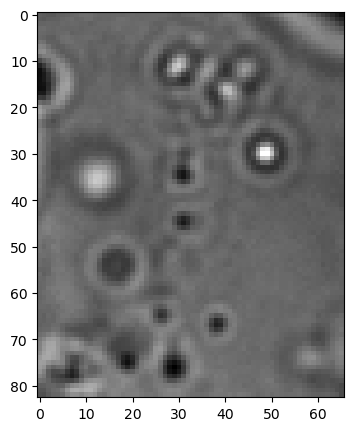

In [19]:
non_rev_frames = pims.open(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index])
print(non_rev_frames[10])
plt.imshow(non_rev_frames[10])

In [20]:
print(np.uint16(2**16-1))

65535


[[38776 37981 37924 ... 30613 28368 26235]
 [39027 38416 38681 ... 34060 31266 29669]
 [39611 39775 39455 ... 37805 35143 33695]
 ...
 [41853 44631 41668 ... 37880 37448 36678]
 [41686 45802 45564 ... 38279 36525 35071]
 [40946 46249 48935 ... 38738 37471 35076]]
[[26759 27554 27611 ... 34922 37167 39300]
 [26508 27119 26854 ... 31475 34269 35866]
 [25924 25760 26080 ... 27730 30392 31840]
 ...
 [23682 20904 23867 ... 27655 28087 28857]
 [23849 19733 19971 ... 27256 29010 30464]
 [24589 19286 16600 ... 26797 28064 30459]]


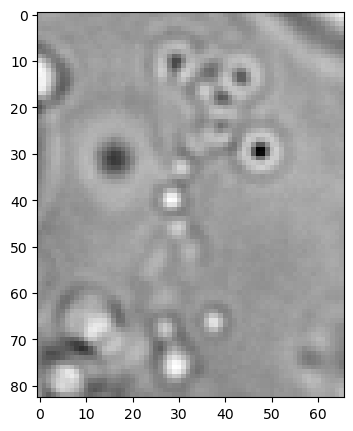

In [20]:
def reverse_brightness(frames):
    print(frames[0])
    frames = np.uint16(2**16-1) - frames
    print(frames[0])
    return frames

rev_frames =reverse_brightness(pims.open(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index]))
#print(rev_frames[10])
plt.imshow(rev_frames[0])

[[40190 39720 39261 ... 31936 28828 25960]
 [39714 39123 39189 ... 35589 31874 29414]
 [39541 39873 40816 ... 38867 35919 33566]
 ...
 [25149 24559 24006 ... 38478 38540 39593]
 [21393 20811 20894 ... 39299 39094 40039]
 [19215 19206 20478 ... 38614 38983 39046]]


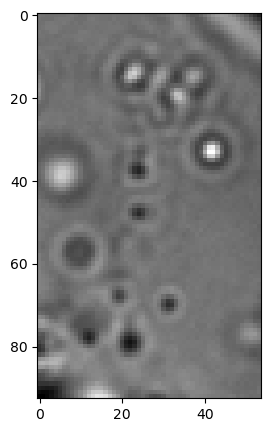

In [212]:
non_rev_frames = pims.open(cropped_path+'/'+'cropped'+original_datas_list[original_datas_index])
print(non_rev_frames[10])
plt.imshow(non_rev_frames[10])

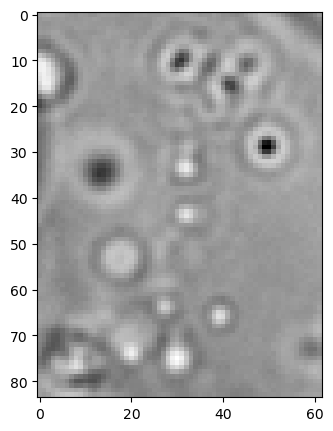

In [21]:
plt.imshow(rev_frames[10])

In [21]:
# Feature diameter must be an odd integer. Round up.
f = tp.locate(rev_frames[10], 11 ,invert=False)

In [69]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep
0,10.550625,41.168859,86431.872104,2.896423,0.418970,5644.971131,2075563.0,0.298285
1,31.461921,48.494834,95383.351579,2.997543,0.535083,4536.539357,2077887.0,0.293798
2,32.666074,31.682031,97230.669052,2.075054,0.102150,7906.221499,2174375.0,0.180853
3,39.099090,16.934580,135135.567367,2.957228,0.439877,4751.247691,2163385.0,0.189135
4,53.115657,17.567068,158934.334589,2.395088,0.049072,5518.623535,2319425.0,0.114615
5,65.933809,39.141687,74213.935647,1.522984,0.144830,7980.956515,2018703.0,0.476221
6,75.035485,29.952780,208844.525529,1.948621,0.052818,13529.721797,2178711.0,0.177782
7,75.935729,7.629459,175928.705675,2.396623,0.288067,9558.856320,2057761.0,0.337801


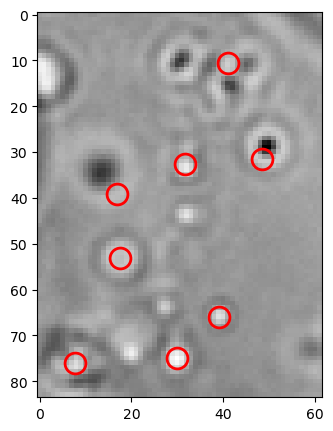

<AxesSubplot: >

In [70]:
tp.annotate(f, rev_frames[10])

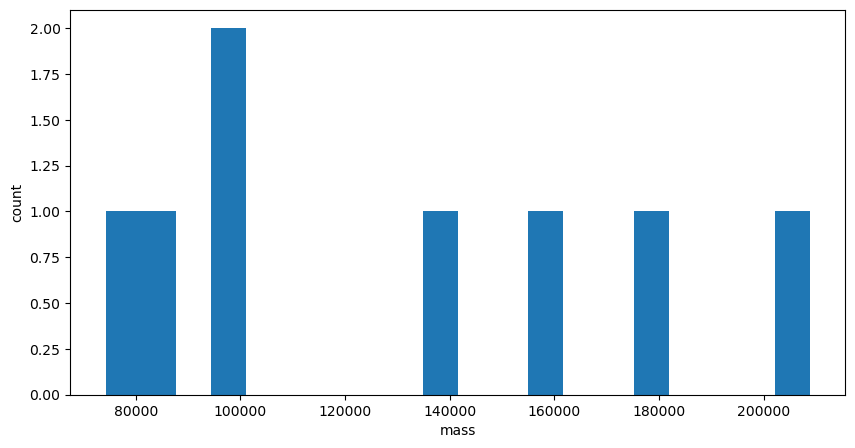

In [49]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [64]:
f = tp.locate(rev_frames[10], 5, invert=True, minmass=100000)

C:\Users\1\anaconda3\envs\cell_tracking_notebook\lib\site-packages\trackpy\feature.py:425: UserWarning: No maxima survived mass- and size-based filtering. Be advised that the mass computation was changed from version 0.2.4 to 0.3.0 and from 0.3.3 to 0.4.0. See the documentation and the convenience functions 'minmass_v03_change' and 'minmass_v04_change'.
  warnings.warn("No maxima survived mass- and size-based filtering. "


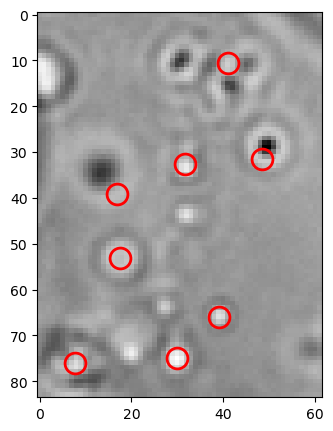

In [71]:
f = tp.locate(rev_frames[10], 11 ,invert=False)
tp.annotate(f, rev_frames[10]);

array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>]], dtype=object)

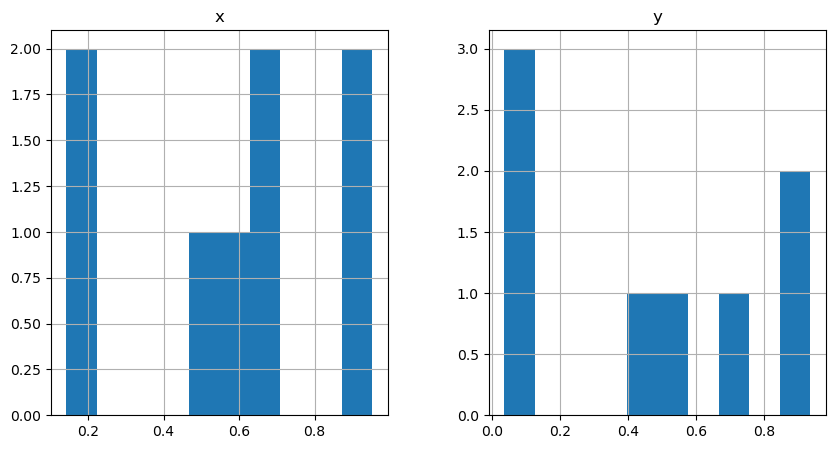

In [72]:
tp.subpx_bias(f)

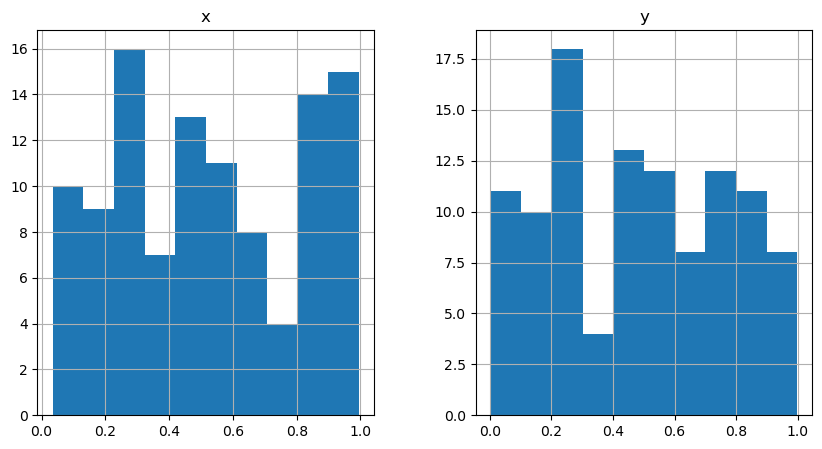

In [84]:
#tp.subpx_bias(tp.locate(frames[0], 21, invert=True, minmass=5000));

In [73]:
f = tp.batch(rev_frames[:500], 11, invert=False);

Frame 499: 8 features


In [74]:
# tp.quiet()  # Turn off progress reports for best performance
t = tp.link(f, 11, memory=5)

Frame 499: 8 trajectories present.


In [75]:
t.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,10.525417,33.422304,69282.067494,2.943676,0.357325,4053.377509,2067430.0,-0.326651,0,0
1,30.558272,48.272221,106577.725661,3.268743,0.418566,4235.172174,2143272.0,-0.562219,0,1
2,33.047738,12.165973,106034.955970,2.975162,0.435072,3987.215512,2126611.0,-0.485331,0,2
3,38.949617,29.410436,82180.238096,1.552447,0.151612,9457.344586,2149809.0,-0.599482,0,3
4,66.423601,12.880314,245187.912616,2.818559,0.182279,9343.521820,2349749.0,0.583618,0,4


In [76]:
t1 = tp.filter_stubs(t, 25)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 160
After: 36


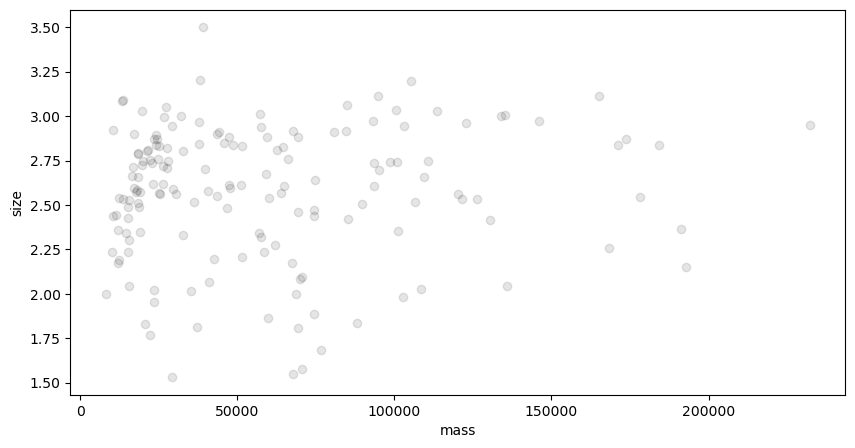

In [77]:
plt.figure()
#tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass
tp.mass_size(t.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [78]:
t2 = t1[((t1['mass'] > 0) & (t1['size'] <2.2) &
         (t1['ecc'] < 0.3))]

#t2 = t1[((t1['mass'] > 50) & (t1['size'] < 2.6) )]
        # ==(t1['ecc'] < 0.3))]

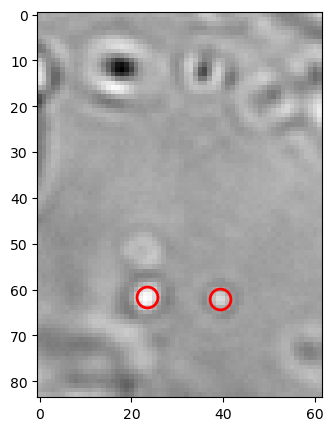

In [82]:
plt.figure()
tp.annotate(t2[t2['frame'] == 150], rev_frames[150]);

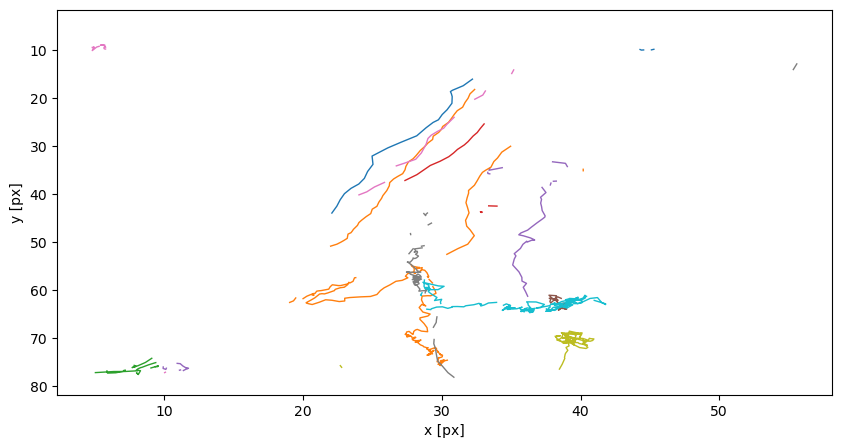

In [80]:
plt.figure()
tp.plot_traj(t2);

In [84]:
d = tp.compute_drift(t2)

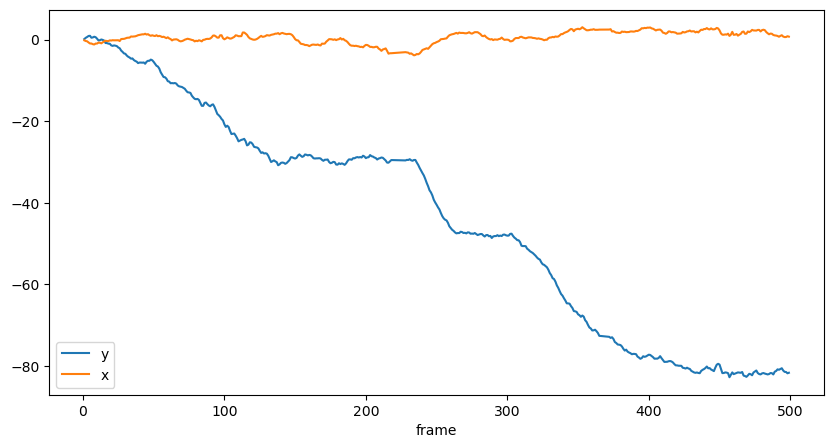

In [85]:
d.plot()
plt.show()

In [86]:
tm = tp.subtract_drift(t2.copy(), d)

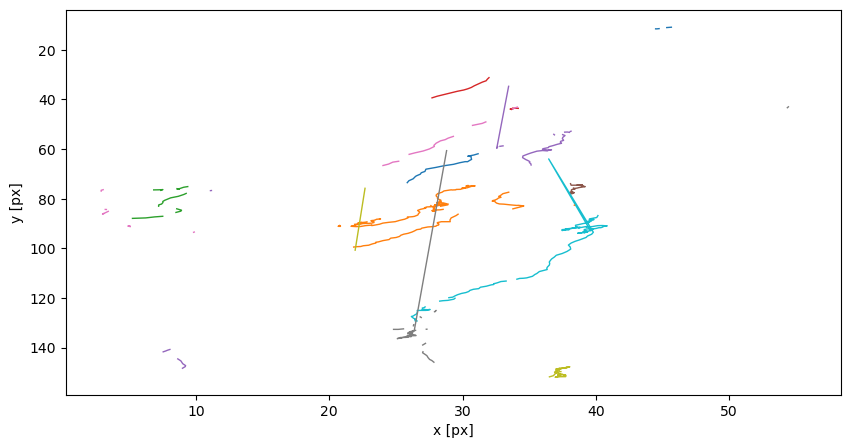

In [87]:
ax = tp.plot_traj(tm)
plt.show()

In [89]:
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24

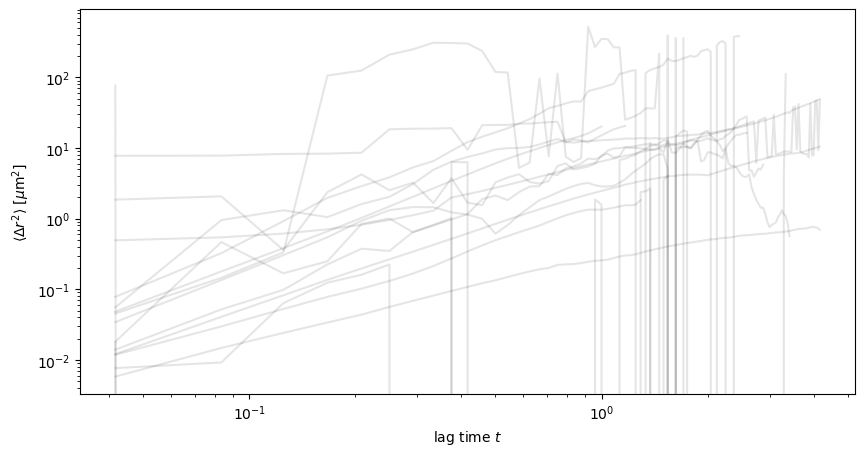

In [90]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')

In [91]:
em = tp.emsd(tm, 100/285., 24) # microns per pixel = 100/285., frames per second = 24

C:\Users\1\anaconda3\envs\cell_tracking_notebook\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\1\anaconda3\envs\cell_tracking_notebook\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


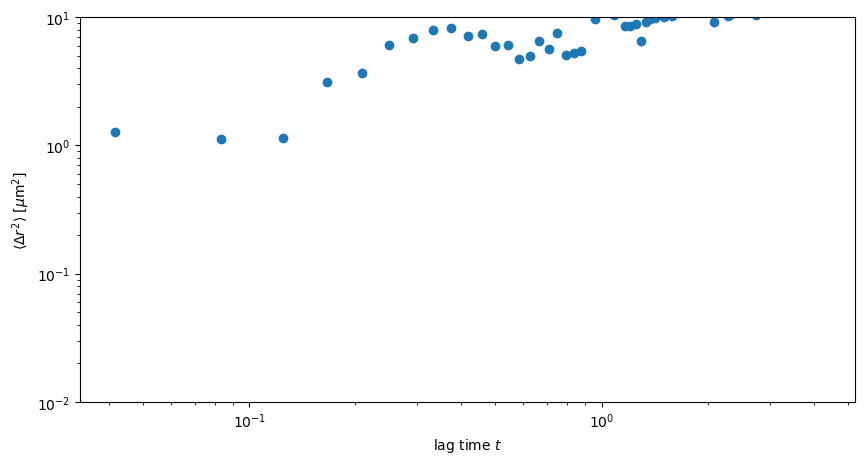

In [92]:
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 10));

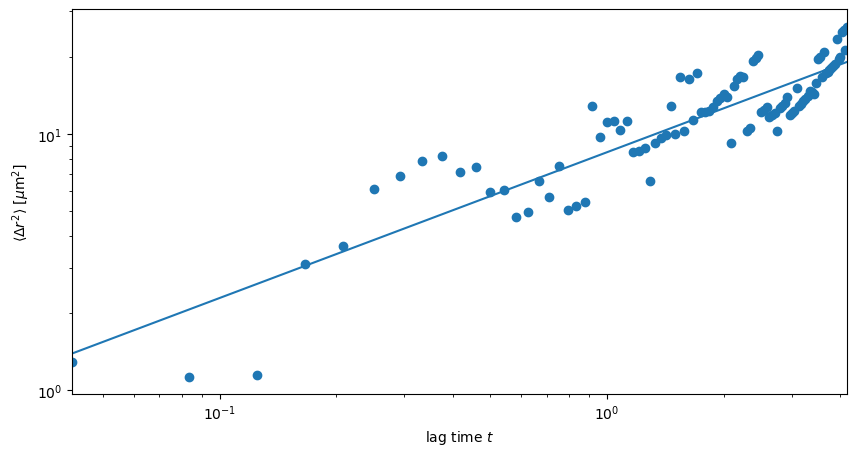

,n,A
msd,0.568537,8.47944


In [93]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)  # performs linear best fit in log space, plots]

In [95]:
%timeit tp.batch(rev_frames[10][:20], 11, invert=True, minmass=20, processes='auto')

Frame 19: 1 features
6.66 s ± 198 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
%timeit tp.batch(rev_frames[:20], 11, invert=False,  engine='python')

Frame 19: 8 features
6.88 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [109]:
with tp.PandasHDFStore('data.h5') as s:
    # As before, we require a minimum "life" of 5 frames and a memory of 3 frames
    for linked in tp.link_df_iter(s, 5, memory=3):
        s.put(linked)

Frame 499: 361 trajectories present.


In [108]:
with tp.PandasHDFStore('data.h5') as s:
    tp.batch(frames, 11, invert=True, minmass=200, output=s)

Frame 499: 361 features


In [110]:
with tp.PandasHDFStore('data.h5') as s:
    trajectories = pd.concat(iter(s))